### Importing Modules

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [3]:
train_path = r"C:\Users\Lenovo\OneDrive\Desktop\NN_CA4\Data\X_Rays\Train" 
test_path = r"C:\Users\Lenovo\OneDrive\Desktop\NN_CA4\Data\X_Rays\Validation"

### Fetching Data using Image Generators

In [4]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


### Creating Model using EfficientNetB3

In [6]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

43941136/43941136 [==============================] - 13s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1536)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                          

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
filepath=r"C:\Users\Lenovo\OneDrive\Desktop\NN_CA4\Model Checkpoint"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call=[checkpoint,lrp]

### Training Model

In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch= 50,
    )

Epoch 1/10
50/50 [==============================] - 92s 2s/step - loss: 0.6463 - accuracy: 0.6900 - precision: 0.7103 - recall: 0.7103 - auc: 0.7753 - val_loss: 1.9956 - val_accuracy: 0.3033 - val_precision: 0.0721 - val_recall: 0.0625 - val_auc: 0.2036
Epoch 2/10
50/50 [==============================] - 90s 2s/step - loss: 0.6703 - accuracy: 0.6800 - precision: 0.7041 - recall: 0.6635 - auc: 0.7754 - val_loss: 1.8491 - val_accuracy: 0.3550 - val_precision: 0.1070 - val_recall: 0.0833 - val_auc: 0.2146
Epoch 3/10
50/50 [==============================] - 88s 2s/step - loss: 0.7067 - accuracy: 0.6450 - precision: 0.6486 - recall: 0.6923 - auc: 0.7251 - val_loss: 1.7963 - val_accuracy: 0.3833 - val_precision: 0.3488 - val_recall: 0.6250 - val_auc: 0.3107
Epoch 4/10
50/50 [==============================] - 395s 8s/step - loss: 0.5835 - accuracy: 0.7550 - precision: 0.7500 - recall: 0.7723 - auc: 0.7952 - val_loss: 1.5033 - val_accuracy: 0.4200 - val_precision: 0.3601 - val_recall: 0.5792 -

### Model Evaluation

In [11]:
model.evaluate(train_generator)

2216/2216 [==============================] - 1645s 743ms/step - loss: 0.3881 - accuracy: 0.8220 - precision: 0.7899 - recall: 0.8826 - auc: 0.9118


[0.3881438374519348,
 0.82195645570755,
 0.7898522019386292,
 0.8825892806053162,
 0.9118402004241943]

In [12]:
model.evaluate(validation_generator)

150/150 [==============================] - 63s 417ms/step - loss: 1.8644 - accuracy: 0.3783 - precision: 0.3350 - recall: 0.5625 - auc: 0.2851


[1.8644211292266846,
 0.37833333015441895,
 0.3349875807762146,
 0.5625,
 0.2850578725337982]

### Testing the Model

1/1 [==============================] - 0s 146ms/step
[[0.7635796]]
THE UPLOADED X-RAY IMAGE IS: Negative for Fracture(s)


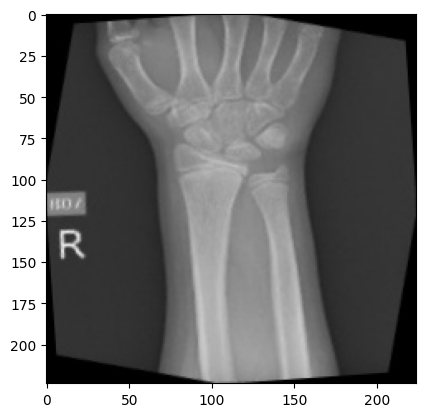

In [24]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img(r"C:\Users\Lenovo\OneDrive\Desktop\NN_CA4\Data\X_Rays\Validation\Negative\1-rotated1-rotated1-rotated1-rotated1.jpg",target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Positive for Fracture(s)"   
else:
      op="Negative for Fracture(s)"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))

1/1 [==============================] - 0s 142ms/step
[[0.47022602]]
THE UPLOADED X-RAY IMAGE IS: Positive for Fracture(s)


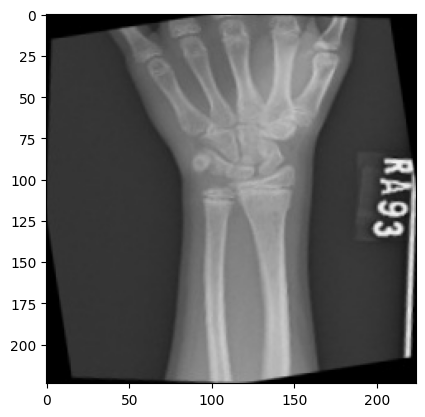

In [40]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img(r"C:\Users\Lenovo\OneDrive\Desktop\NN_CA4\Data\X_Rays\Validation\Positive\1-rotated1-rotated1-rotated1.jpg",target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Positive for Fracture(s)"   
else:
      op="Negative for Fracture(s)"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))

### Summary
- Predictions are made correctly for the most part
- Model accuracy can be better
